In [1]:
import sys
sys.path.append('./../')

import ikamoana.ikaseapodym as ikadym

from ikamoana.utils import seapodymFieldConstructor
from ikamoana.ikafish.ikafish import IkaFishDebug

In [2]:
configuration_filepath = "./../data/ikamoana_config/IkaSim_Example_Fish.xml"
my_sim = ikadym.IkaSeapodym(filepath=configuration_filepath)

In [3]:
my_sim.ika_params

{'start_distribution': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/',
 'seapodym_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/SEAPODYM_data/run-test/skj_CLT_e5_3_est.xml',
 'forcing_dir': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/',
 'start_time': numpy.datetime64('2000-01-15'),
 'duration_time': 94694400,
 'delta_time': 86400,
 'output_delta_time': 7776000,
 'spatial_limits': {'lonlim': (120.0, 290.0), 'latlim': (-40.0, 50.0)},
 'files_only': False,
 'forcing_files': {'forcing_dataarray': {}, 'forcing_dataset': {}},
 'fields_interp_method': 'nearest',
 'start_length': 26.43,
 'ageing_cohort': True,
 'number_of_cohorts': 10000,
 'start_dynamic_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/skj_age',
 'start_dynamic_file_extension': 'dym',
 'start_static_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/skj_age5.nc',
 'start_cell': {'lon': 150.0

In [4]:
## Using Inna's feeding habitat : ########
# fh = xr.load_dataarray("./../../data/Inna/Modified_skj_cohort_habitat_20080115-20080515_20080115.nc")
# my_sim.loadFields(from_habitat=fh)

## Using ikafield class : ################
my_sim.loadFields()

 It will also add +1 to sigma_min. Cf. function documentation for more details.


In [5]:
# my_sim.initializeParticleSet(particles_class=IkaFish, method="start_static_file")
my_sim.initializeParticleSet(particles_class=IkaFishDebug, method="start_dynamic_file")

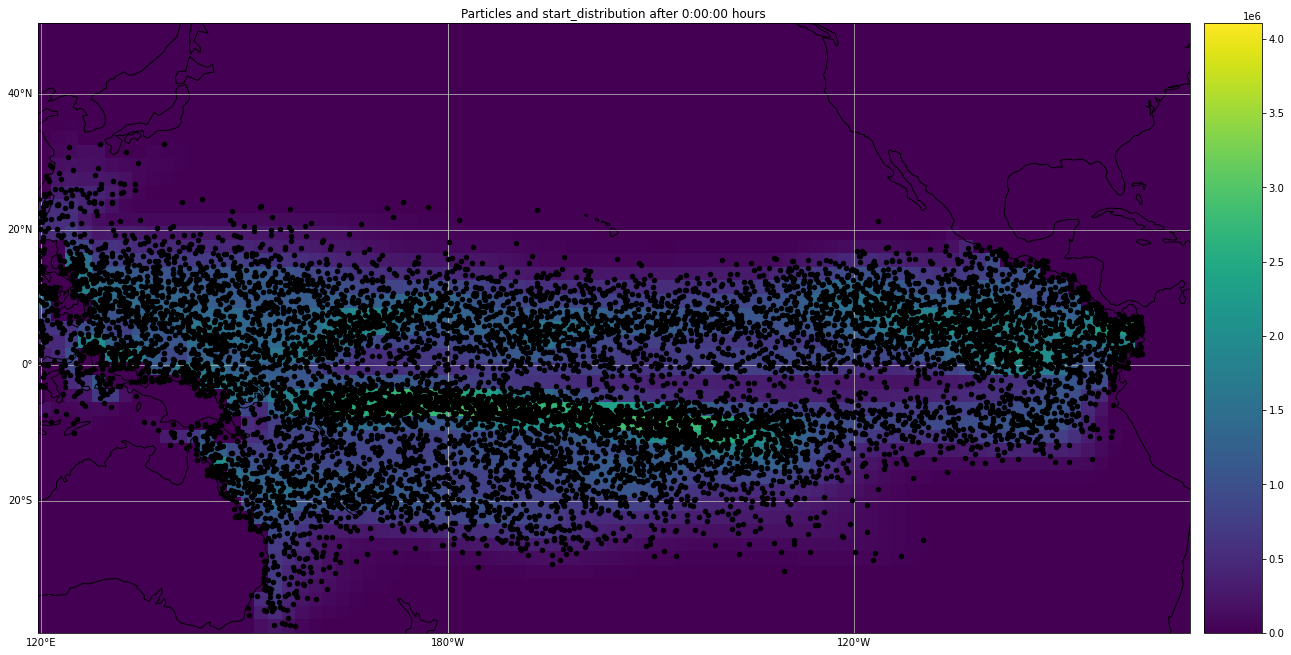

In [6]:
my_sim.fish.show(field=my_sim.ocean.start_distribution)

In [7]:
my_sim.runKernels(save=True)

INFO: Compiled ArrayIkaFishDebugCalcLonLatScalersIkAdvectionRK4TaxisRK4RandomWalkNonUniformDiffusionIkaDimMoveWithDiffusionRerollLandBlockAge ==> /tmp/parcels-1000/lib85a14805f85f36a72590cd4d310efd1f_0.so
/home/ash/anaconda3/envs/ikamoana/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


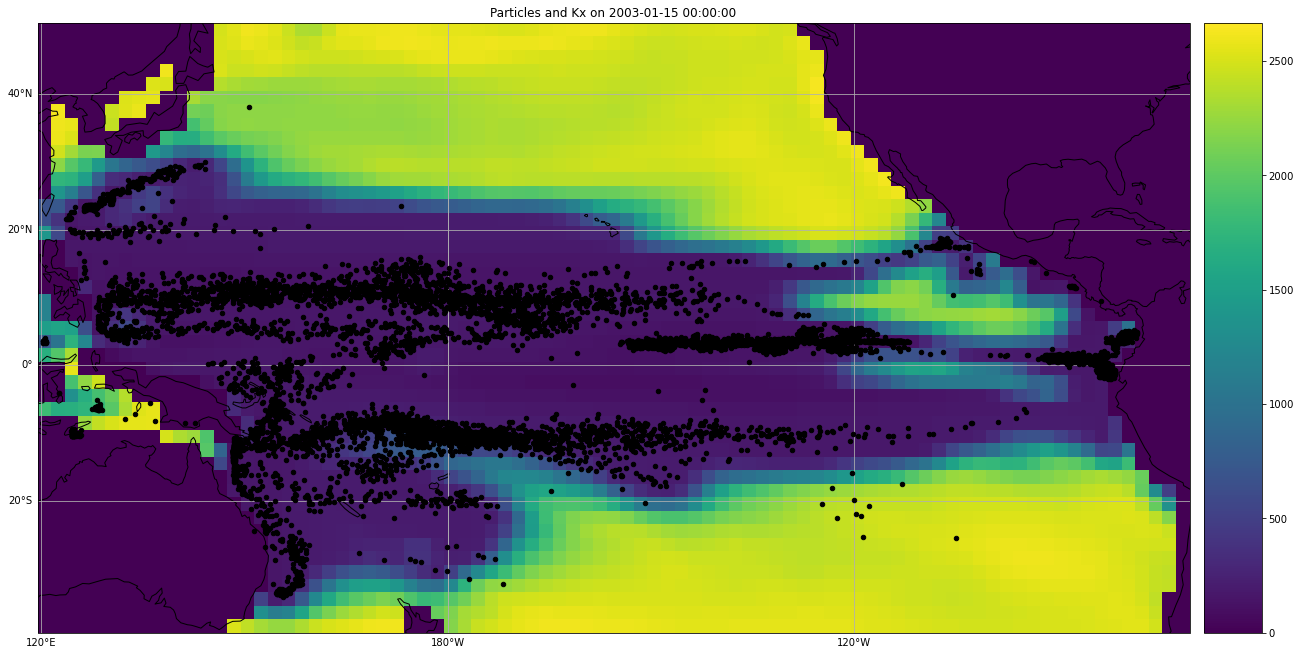

In [8]:
my_sim.fish.show(field=my_sim.ocean.Kx)

In [9]:
my_sim.fish[0]

P[0](lon=171.808350, lat=10.294099, depth=0.000000, Tx=0.000005, Ty=0.000005, age=110246400.000000, age_class=42.000000, loop_count=0.000000, f_lat=0.000009, f_lon=0.000009, Dx=0.009088, Dy=0.037299, Cx=0.000003, Cy=-0.000054, Ax=-0.090699, Ay=0.021416, Rx_component=8798.363281, Ry_component=8798.367188, time=94694400.000000)

---

In [10]:
import xarray as xr
tmp = xr.load_dataset("./IkaSim_Example_Fish_particleFile.nc")
tmp

<xarray.Dataset>
Dimensions:       (traj: 10000, obs: 14)
Dimensions without coordinates: traj, obs
Data variables: (12/20)
    trajectory    (traj, obs) float64 0.0 0.0 0.0 ... 9.999e+03 9.999e+03
    time          (traj, obs) datetime64[ns] 2000-01-15 ... 2003-01-15
    lat           (traj, obs) float32 -1.29 1.562 2.952 ... -13.34 -12.72 -12.54
    lon           (traj, obs) float32 145.4 136.0 135.9 ... 148.5 148.5 148.5
    z             (traj, obs) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Tx            (traj, obs) float32 0.0 -0.0008072 ... 0.07188 -0.0003232
    ...            ...
    Cx            (traj, obs) float32 0.0 -1.055e-05 ... -0.00273 8.538e-05
    Cy            (traj, obs) float32 0.0 8.793e-05 ... 1.699e-05 -0.0001018
    Ax            (traj, obs) float32 0.0 -0.09551 0.06443 ... -0.03302 -0.05627
    Ay            (traj, obs) float32 0.0 0.03876 ... -0.004276 0.03676
    Rx_component  (traj, obs) float32 0.0 4.413e+03 ... 7.465e+03 9.222e+03
    Ry_component  (traj, obs) float32 0.0 3.173e+03 ... 9.529e+03 9.224e+03
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.3.0
    parcels_mesh:           spherical

In [11]:
tmp['age_class'][0]

<xarray.DataArray 'age_class' (obs: 14)>
array([ 6.,  8., 11., 14., 17., 20., 23., 26., 29., 32., 35., 38., 41.,
       42.], dtype=float32)
Dimensions without coordinates: obs
Attributes:
    long_name:      
    standard_name:  age_class
    units:          unknown

In [12]:
tmp['age'][0]

<xarray.DataArray 'age' (obs: 14)>
array([1.555200e+07, 2.332800e+07, 3.110400e+07, 3.888000e+07,
       4.665600e+07, 5.443200e+07, 6.220800e+07, 6.998400e+07,
       7.776000e+07, 8.553600e+07, 9.331200e+07, 1.010880e+08,
       1.088640e+08, 1.102464e+08], dtype=float32)
Dimensions without coordinates: obs
Attributes:
    long_name:      
    standard_name:  age
    units:          unknown